In [328]:
from bs4 import BeautifulSoup
import requests
import time

In [4]:
url = BeautifulSoup(requests.get("http://www.imdb.com/title/tt0111161/").content)

C:\Users\akheel\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\akheel\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


### Methods to extract data points of interest


In [117]:
def get_plot_summary(url):
    summary = url.findAll("div",class_="inline canwrap")
    line = summary[0].get_text()
    return line.strip()

In [118]:
get_plot_summary(url)

"Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red.                Written by\nJ-S-Golden"

In [120]:
def get_director(url):
    lines = url.findAll("div",class_="credit_summary_item")
    line = lines[0].a.get_text()
    return line.strip()

In [121]:
get_director(url)

'Frank Darabont'

In [115]:
def get_cast(url):
    cast = []
    lines = url.findAll("div",id="titleCast")
    lines = lines[0].findAll("td",class_="itemprop")
    for i in lines:
        try:
            cast.append(str(i.a.get_text()))
        except AttributeError:
            pass
    return cast


In [116]:
get_cast(url)

[' Tim Robbins\n',
 ' Morgan Freeman\n',
 ' Bob Gunton\n',
 ' William Sadler\n',
 ' Clancy Brown\n',
 ' Gil Bellows\n',
 ' Mark Rolston\n',
 ' James Whitmore\n',
 ' Jeffrey DeMunn\n',
 ' Larry Brandenburg\n',
 ' Neil Giuntoli\n',
 ' Brian Libby\n',
 ' David Proval\n',
 ' Joseph Ragno\n',
 ' Jude Ciccolella\n']

In [190]:
import re
def get_metadata(url):
    info = []
    lines = url.findAll("div",class_="txt-block")
    for i in lines:
        line = i.get_text()
        if line.find(":") != -1:
            values = line.split(":")
            key = values[0].strip()
            value = values[1].strip().replace("\n","")
            value = re.sub("\s\s+.*","",value)
            valid_keys = [ key == "Taglines",key == "Country",key == "Language",key == "Budget",key == "Runtime",key == "Release Date"]
            if any(valid_keys):
                info.append({key:value})
    return info
            
            
            

In [191]:
get_metadata(url)

[{'Taglines': 'Fear can hold you prisoner. Hope can set you free.'},
 {'Country': 'USA'},
 {'Language': 'English'},
 {'Release Date': '14 October 1994 (USA)'},
 {'Budget': '$25,000,000'},
 {'Runtime': '142 min'}]

In [210]:
def get_critic_rating(url):
    lines = url.findAll("div",class_="ratingValue")
    return float(lines[0].span.get_text())

In [211]:
get_critic_rating(url)

9.3

In [294]:
def get_r_rating(url):
    try:
        lines = url.findAll("div",class_="subtext")
        line = lines[0].findAll("meta",itemprop="contentRating")
        print(line)
        return line['content']
    except TypeError:
        return "Unrated"

In [295]:
get_r_rating(url)

[]


'Unrated'

In [259]:
def get_genres(url):
    lines = url.findAll("div",class_="rec-cert-genre rec-elipsis")
    return re.sub("\s\s+","",lines[0].get_text().strip())

In [260]:
get_genres(url)

'Crime|Drama'

In [271]:
def get_title(url):
    return re.sub("\s\(.*","",url.head.title.get_text())
    

In [272]:
get_title(url)

'The Shawshank Redemption'

In [357]:
def get_movie_data(url):
    url = BeautifulSoup(requests.get(url).content)
    title = get_title(url)
    rating = get_critic_rating(url)
    director = get_Director(url)
    genres = get_genres(url)
    meta = get_metadata(url)
    cast = get_cast(url)
    r_rating = get_r_rating(url)
    plot = get_plot_summary(url)
    return {"title":title,
            "rating":rating,
            "director":director,
            "genres":genres,
            "metadata":meta,
            "cast":cast,
            "r_rating":r_rating,
            "plot":plot        
    }
    

### Scrape links of movies from "250 greatest movies" web page

In [310]:
imbd_top_250_page = BeautifulSoup(requests.get("http://www.imdb.com/chart/top").content)

C:\Users\akheel\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\akheel\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [311]:
imbd_top_250_links = imbd_top_250_page.findAll("td",class_="titleColumn")

### Scrape each movies off individual web page

In [326]:
#extrating all movie links from IMBD top 250 movie page
imbd_links = []
for i in imbd_top_250_links:
    links = i.findAll('a')
    links = [link['href'] for link in links]
    for i in links:
        imbd_links.append("http://www.imdb.com" + re.sub("\?.*","",i))
    

In [354]:
imbd_links

['http://www.imdb.com/title/tt0111161/',
 'http://www.imdb.com/title/tt0068646/',
 'http://www.imdb.com/title/tt0071562/',
 'http://www.imdb.com/title/tt0468569/',
 'http://www.imdb.com/title/tt0108052/',
 'http://www.imdb.com/title/tt0050083/',
 'http://www.imdb.com/title/tt0110912/',
 'http://www.imdb.com/title/tt0167260/',
 'http://www.imdb.com/title/tt0060196/',
 'http://www.imdb.com/title/tt0137523/',
 'http://www.imdb.com/title/tt0120737/',
 'http://www.imdb.com/title/tt0080684/',
 'http://www.imdb.com/title/tt0109830/',
 'http://www.imdb.com/title/tt1375666/',
 'http://www.imdb.com/title/tt0167261/',
 'http://www.imdb.com/title/tt0073486/',
 'http://www.imdb.com/title/tt0099685/',
 'http://www.imdb.com/title/tt0133093/',
 'http://www.imdb.com/title/tt0047478/',
 'http://www.imdb.com/title/tt0076759/',
 'http://www.imdb.com/title/tt0317248/',
 'http://www.imdb.com/title/tt0114369/',
 'http://www.imdb.com/title/tt0102926/',
 'http://www.imdb.com/title/tt0038650/',
 'http://www.imd

In [364]:
imbd_movies = []

In [365]:
count = 0
for link in imbd_links:
    imbd_movies.append(get_movie_data(link))
    count += 1
    print(count)
    time.sleep(1)

C:\Users\akheel\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\akheel\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


[<meta content="R" itemprop="contentRating"/>]
1
[]
2
[]
3
[<meta content="PG-13" itemprop="contentRating"/>]
4
[<meta content="R" itemprop="contentRating"/>]
5
[]
6
[<meta content="R" itemprop="contentRating"/>]
7
[<meta content="PG-13" itemprop="contentRating"/>]
8
[]
9
[<meta content="R" itemprop="contentRating"/>]
10
[<meta content="PG-13" itemprop="contentRating"/>]
11
[<meta content="PG" itemprop="contentRating"/>]
12
[<meta content="PG-13" itemprop="contentRating"/>]
13
[<meta content="PG-13" itemprop="contentRating"/>]
14
[<meta content="PG-13" itemprop="contentRating"/>]
15
[]
16
[]
17
[<meta content="R" itemprop="contentRating"/>]
18
[]
19
[<meta content="PG" itemprop="contentRating"/>]
20
[<meta content="R" itemprop="contentRating"/>]
21
[<meta content="R" itemprop="contentRating"/>]
22
[]
23
[<meta content="PG" itemprop="contentRating"/>]
24
[<meta content="R" itemprop="contentRating"/>]
25
[<meta content="PG-13" itemprop="contentRating"/>]
26
[<meta content="R" itemprop="c

In [367]:
import json
with open('D:/data.txt', 'w') as f:
    json.dump(imbd_movies, f, ensure_ascii=False)

In [368]:
d = json.load(open('D:/data.txt'))

In [369]:
import pandas as pd

In [370]:
data = pd.DataFrame(d)

In [371]:
data

,cast,director,genres,metadata,plot,r_rating,rating,title
0,"[ Tim Robbins\n, Morgan Freeman\n, Bob Gunto...",Frank Darabont,Crime|Drama,[{'Taglines': 'Fear can hold you prisoner. Hop...,Chronicles the experiences of a formerly succe...,Unrated,9.3,The Shawshank Redemption
1,"[ Marlon Brando\n, Al Pacino\n, James Caan\n...",Francis Ford Coppola,Crime|Drama,[{'Taglines': 'The Godfather is now a movie.'}...,When the aging head of a famous crime family d...,Unrated,9.2,The Godfather
2,"[ Al Pacino\n, Robert Duvall\n, Diane Keaton...",Francis Ford Coppola,Crime|Drama,"[{'Country': 'USA'}, {'Language': 'English|Ita...",The continuing saga of the Corleone crime fami...,Unrated,9.0,The Godfather: Part II
3,"[ Christian Bale\n, Heath Ledger\n, Aaron Ec...",Christopher Nolan,Action|Thriller,"[{'Taglines': 'Why So Serious?'}, {'Country': ...",Set within a year after the events of Batman B...,Unrated,9.0,The Dark Knight
4,"[ Liam Neeson\n, Ben Kingsley\n, Ralph Fienn...",Steven Spielberg,Comedy|Drama,"[{'Taglines': 'The List Is Life.'}, {'Country'...",Oskar Schindler is a vainglorious and greedy G...,Unrated,8.9,Schindler's List
5,"[ Martin Balsam\n, John Fiedler\n, Lee J. Co...",Sidney Lumet,Western,[{'Taglines': '...it explodes like twelve stic...,The defense and the prosecution have rested an...,Unrated,8.9,12 Angry Men
6,"[ Tim Roth\n, Amanda Plummer\n, Laura Lovela...",Quentin Tarantino,Drama,[{'Taglines': 'Just because you are a characte...,Jules Winnfield and Vincent Vega are two hitme...,Unrated,8.9,Pulp Fiction
7,"[ Noel Appleby\n, Ali Astin\n, Sean Astin\n,...",Peter Jackson,Action|Adventure|Drama,[{'Taglines': 'The eye of the enemy is moving....,While Frodo & Sam continue to approach Mount D...,Unrated,8.9,The Lord of the Rings: The Return of the King
8,"[ Eli Wallach\n, Clint Eastwood\n, Lee Van C...",Sergio Leone,Western,[{'Taglines': 'The Man with No Name Returns!'}...,Blondie (The Good) is a professional gunslinge...,Unrated,8.9,"Il buono, il brutto, il cattivo"
9,"[ Edward Norton\n, Brad Pitt\n, Meat Loaf\n,...",David Fincher,Crime|Drama,"[{'Taglines': 'Mischief. Mayhem. Soap.'}, {'Co...",A ticking-time-bomb insomniac and a slippery s...,Unrated,8.8,Fight Club


In [374]:
data.metadata[0]

[{'Taglines': 'Fear can hold you prisoner. Hope can set you free.'},
 {'Country': 'USA'},
 {'Language': 'English'},
 {'Release Date': '14 October 1994 (USA)'},
 {'Budget': '$25,000,000'},
 {'Runtime': '142 min'}]

In [390]:
data.metadata = data.metadata.apply(lambda x: {k:v for i in x for k,v in i.items()})

In [395]:
data.metadata[1]

{'Budget': '$6,000,000',
 'Country': 'USA',
 'Language': 'English|Italian|Latin',
 'Release Date': '24 March 1972 (USA)',
 'Runtime': '175 min',
 'Taglines': 'The Godfather is now a movie.'}

In [400]:
data["budget"] = data.metadata.apply(lambda x:x.get('Budget',''))
data["country"] = data.metadata.apply(lambda x:x.get('Country',''))
data["language"] = data.metadata.apply(lambda x:x.get('Language',''))
data["release Date"] = data.metadata.apply(lambda x:x.get('Release Date',''))
data["runtime"] = data.metadata.apply(lambda x:x.get('Runtime',''))
data["taglines"] = data.metadata.apply(lambda x:x.get('Taglines',''))

In [404]:
data.drop('metadata',1,inplace=True)

In [425]:
data['cast'] = data.cast.apply(lambda x:[i.replace("\n","") for i in x])

In [434]:
import matplotlib.pyplot as plt
%matplotlib inline

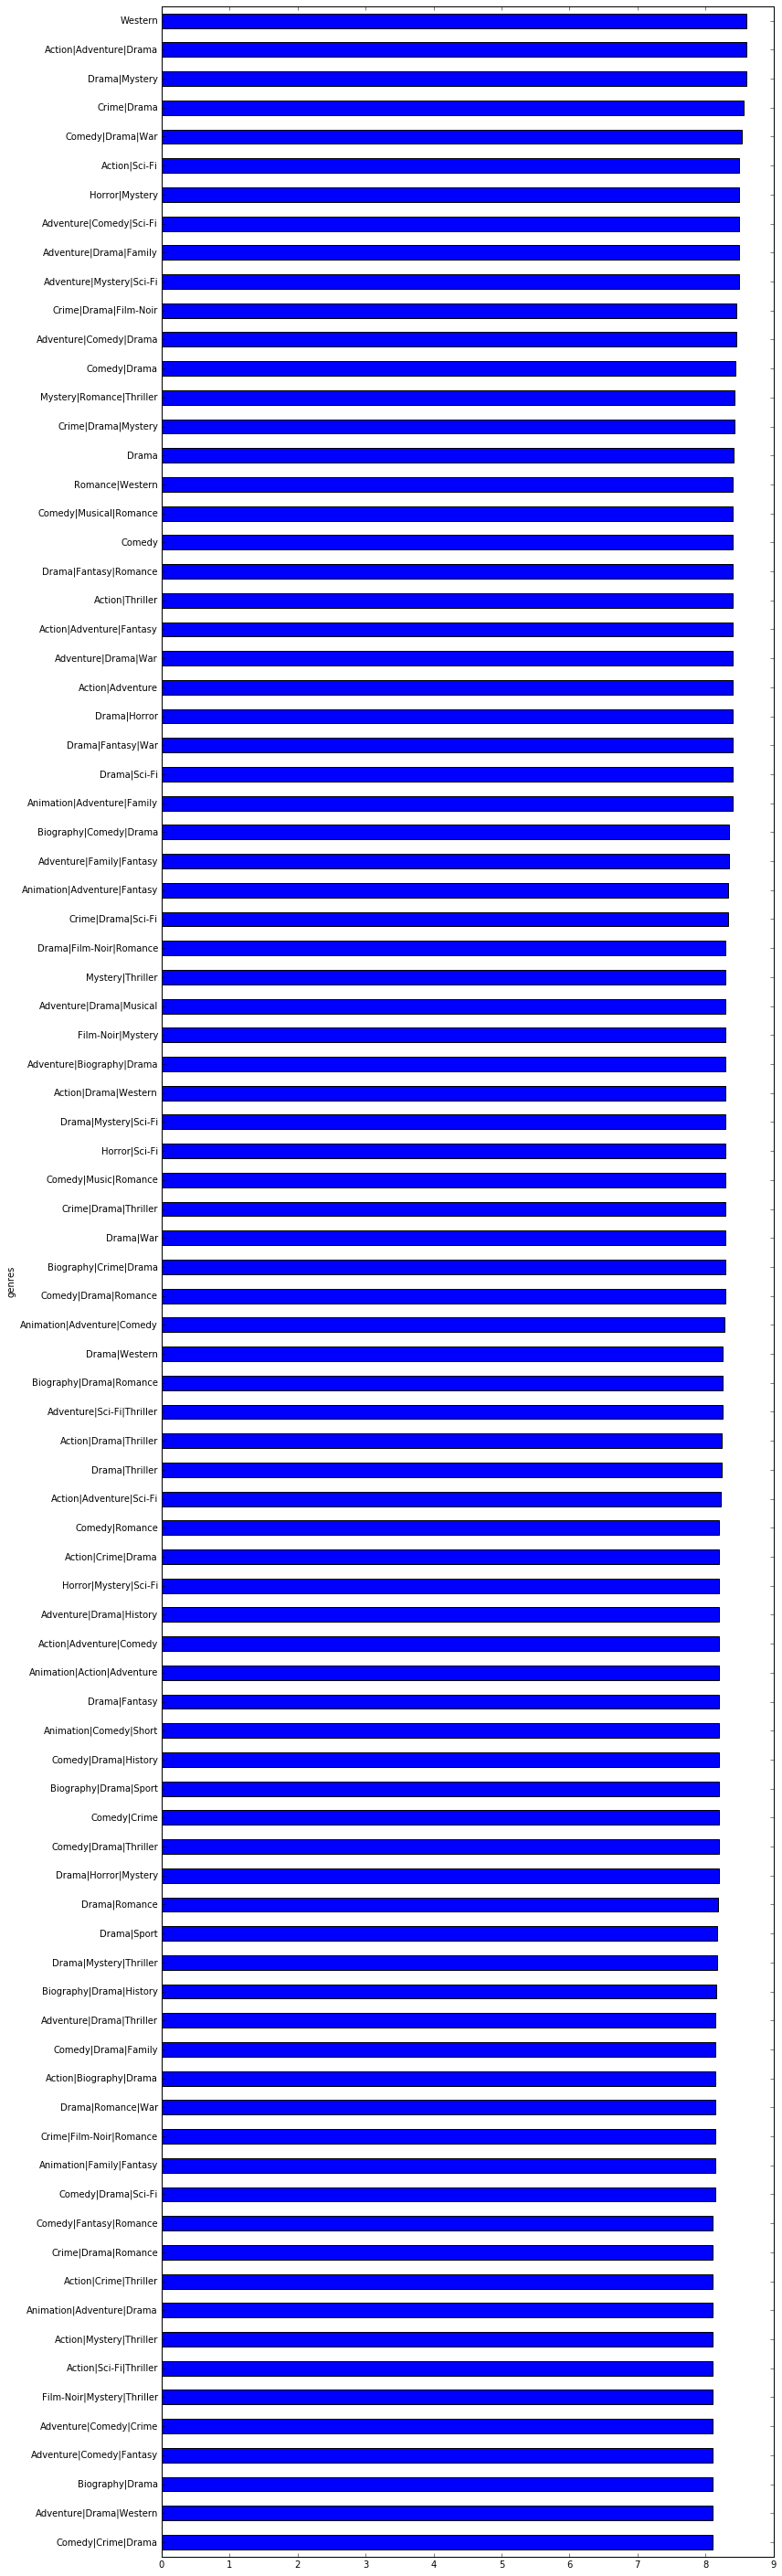

In [439]:
data.groupby('genres')['rating'].mean().sort_values().plot(kind="barh",figsize=(12,50))

In [450]:
data.budget

0          $25,000,000
1           $6,000,000
2          $13,000,000
3         $185,000,000
4          $22,000,000
5             $350,000
6           $8,000,000
7          $94,000,000
8           $1,200,000
9          $63,000,000
10         $93,000,000
11         $18,000,000
12         $55,000,000
13        $160,000,000
14         $94,000,000
15          $4,400,000
16         $25,000,000
17         $63,000,000
18          $2,000,000
19         $11,000,000
20          $3,300,000
21         $33,000,000
22         $19,000,000
23          $3,180,000
24          $6,000,000
25         $20,000,000
26     FRF 115,000,000
27         $19,000,000
28          $5,000,000
29         $70,000,000
            ...       
220        $58,000,000
221         $6,428,966
222         $8,000,000
223         $1,200,000
224        $46,000,000
225         €2,590,000
226        $11,000,000
227       $135,000,000
228        $40,000,000
229       $250,000,000
230                   
231           $800,000
232        